In [1]:
import torch

import matplotlib.pyplot as plt

In [2]:
UNSUP_HEBBIAN_PATH_MODEL = "/mnt/Workspace/hebbian-bootstraping-semi-supervised-medical-imaging/runs/Atrial/hebbian_unsup/unet3d_swta_t/inv_temp-1/regime-100/run-0/checkpoints/last.pth"
SEMI_SUP_PATH_MODEL = "./runs/Atrial/semi_sup/unet3d/inv_temp-1/regime-1/run-2/checkpoints/last.pth"
SEMI_SUP_HEBBIAN_PATH_MODEL = "./runs/GlaS/semi_sup/h_unet_swta_t/inv_temp-10/regime-20/run-0/checkpoints/last.pth"

In [3]:
def plot_weights(path):
    state_dict = torch.load(path, map_location='cpu')

    layers_keys = state_dict['model'].keys()
    layers_keys = [k for k in layers_keys if k.endswith(".weight")]
    layers_keys = [k for k in layers_keys if state_dict['model'][k].ndim > 1]

    fig, axes = plt.subplots(5, 5, figsize=(16, 16), sharex=True)

    for i in range(len(layers_keys)):
        data = torch.histogram(state_dict['model'][layers_keys[i]], 20) 
        k, h = i % 5, i // 5

        x = [(data[1][i]+data[1][i+1])/2 for i in range(len(data[1])-1)]
        width = [data[1][i+1] - data[1][i] for i in range(len(data[1])-1)]

        axes[h][k].bar(x, data[0], edgecolor="black", width=width)

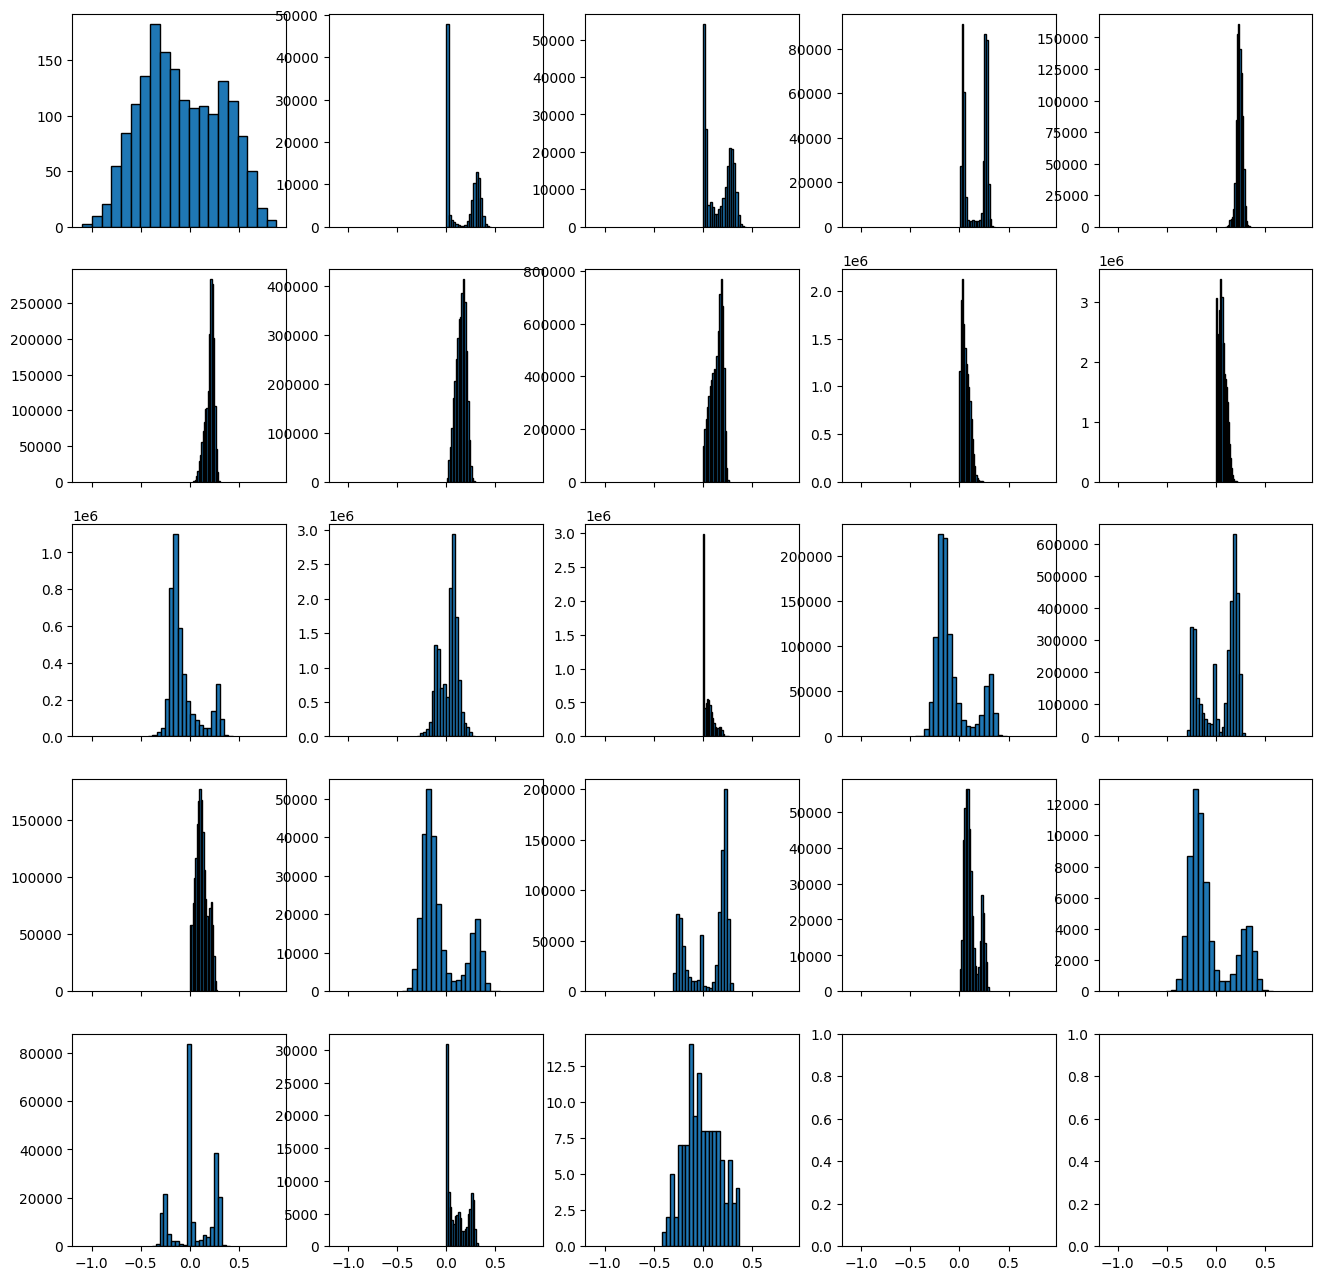

In [4]:
plot_weights(UNSUP_HEBBIAN_PATH_MODEL)

In [ ]:
plot_weights(SEMI_SUP_HEBBIAN_PATH_MODEL)

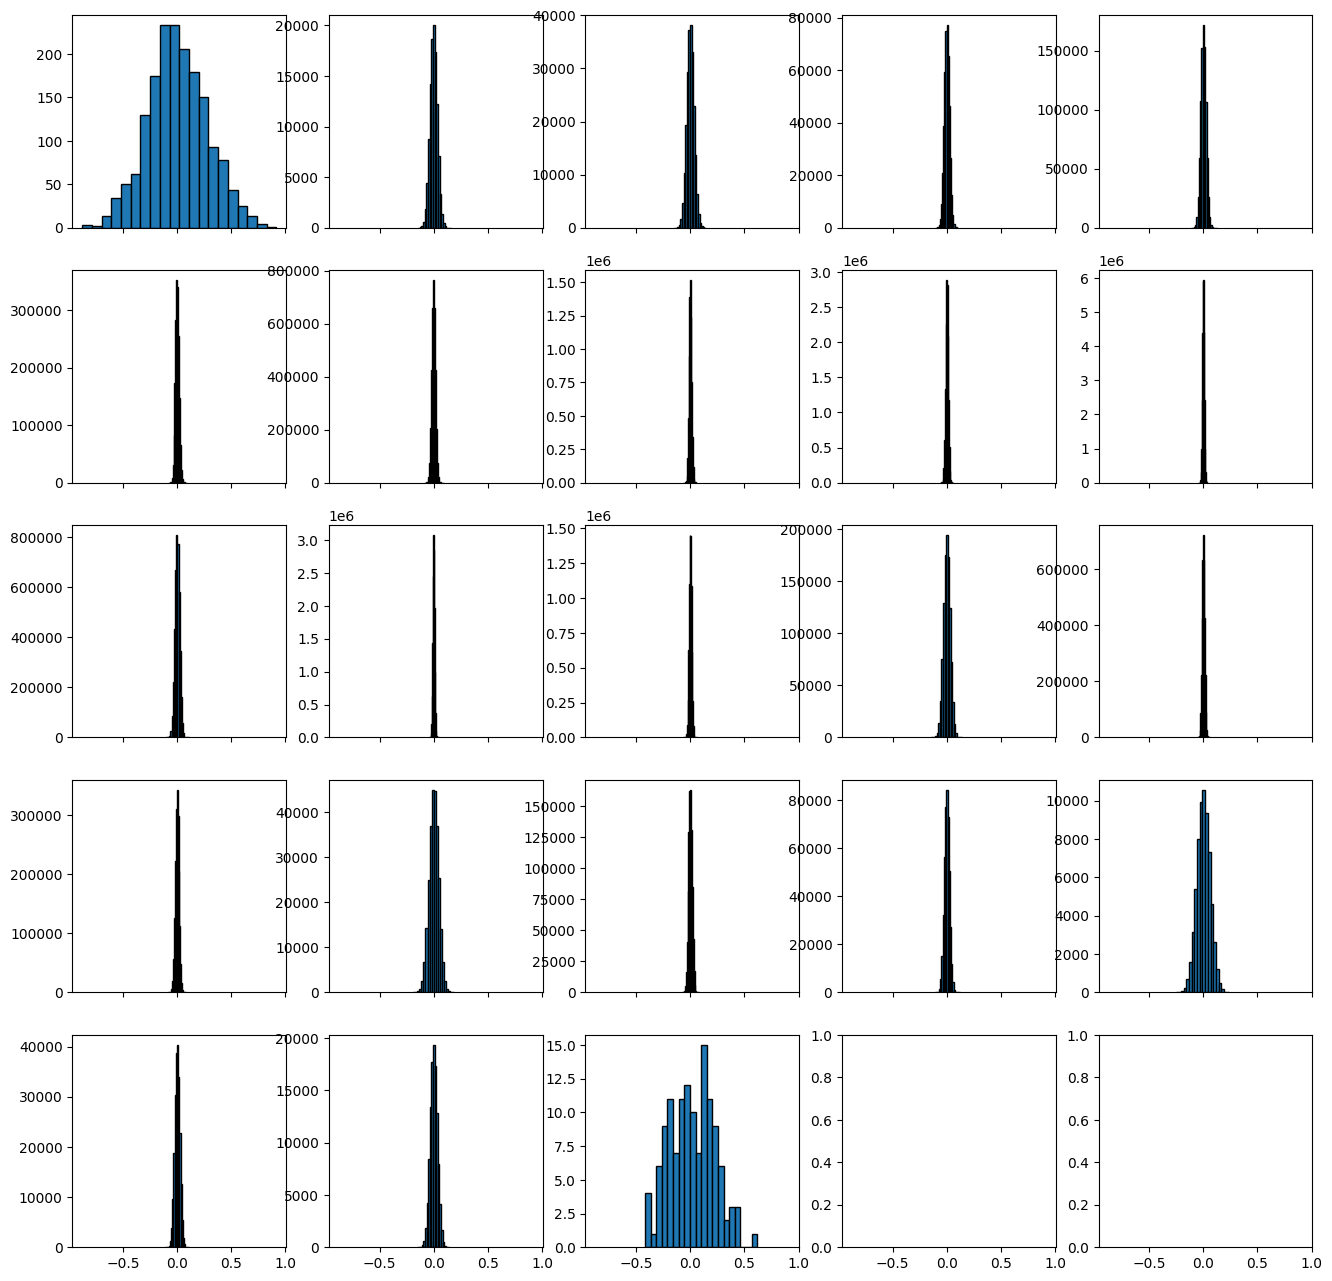

In [9]:
plot_weights(SEMI_SUP_PATH_MODEL)